In [40]:
import os
import PyLasMech as plm
import numpy as np
import pandas as pd

In [10]:
CMGWellFiles=plm.FileFinder("../Data/",fext=".xlsx")

[IO] Found 3 log files


,FileName,Location
0,CMGWell_Geomech.xlsx,..\Data\CMGWell_Geomech.xlsx
1,cmg_all_cells.xlsx,..\Data\cmg_all_cells.xlsx
2,cmg_volve_wells.xlsx,..\Data\CMG\cmg_volve_wells.xlsx


In [27]:
CMGwells = pd.read_excel(CMGWellFiles[0], sheet_name=None)
CMGWellNames=list(CMGwells.keys())
print("Found CMG wells ",CMGWellNames)

Found CMG wells  ['I-F-1B', 'P-F-1C', 'P-F-11B', 'P-F-12', 'P-F-14', 'P-F-15C', 'P-F-15D', 'I-F-4', 'I-F-5']


In [28]:
print(CMGwells['I-F-1B'].columns.get_level_values(0))

Index(['Unnamed: 0', 'Block UBA', 'Grid Centroid X (m)', 'Grid Centroid Y (m)',
       'Grid centroid Z(m)', 'SV', 'SHMAX', 'SHMIN', 'UCS', 'E', 'V', 'P_PORE',
       'PORO', 'CMG Pore Pressure (MPa)', 'CMG Porosity'],
      dtype='object')


Avg Diff Pp= 3.820535832446008


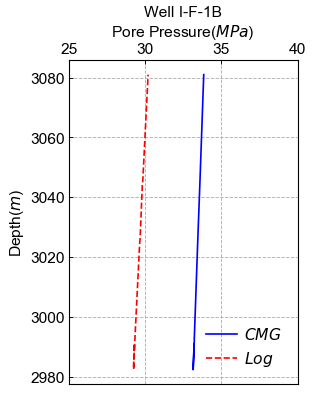

Avg Diff porosity= 0.07520413732038972


In [ ]:
OutputFolder="./output/Log_CMG_Compare/"
os.makedirs(OutputFolder, exist_ok=True)

NumWells=len(CMGWellNames)
for i in range(NumWells): #Loop for each well
    name=CMGWellNames[i]
    DZ=CMGwells[name].loc[:,"Grid centroid Z(m)"]
    phi_log=CMGwells[name].loc[:,"PORO"]
    phi_CMG=CMGwells[name].loc[:,"CMG Porosity"]
    Pp_log=CMGwells[name].loc[:,"P_PORE"]
    Pp_CMG=CMGwells[name].loc[:,"CMG Pore Pressure (MPa)"]
    
    fname=OutputFolder+name +'_Ppcompare.png'
    
    print("Avg Diff Pp=",np.average(np.abs(Pp_log-Pp_CMG)))
    plm.utils.plotTables(Y=[DZ,DZ],X=[Pp_CMG,Pp_log],
           XLable="Well "+name+'\nPore Pressure($MPa$)',YLabel='Depth($m$)',
           DataNames=['$CMG$','$Log$'],
           Xlim=[25,40],
           InvertY=True,img_fname=fname)
    
    fname=OutputFolder+name +'_POROcompare.png'
    print("Avg Diff porosity=",np.average(np.abs(phi_log-phi_CMG)))
    plm.utils.plotTables(Y=[DZ,DZ],X=[phi_CMG,phi_log],
           XLable="Well "+name+'\nPorosity(-)',YLabel='Depth($m$)',
           DataNames=['$CMG$','$Log$'],Xlim=[0,0.5],
           InvertY=True,img_fname=fname)